In [1]:
from __future__ import absolute_import,division,print_function

import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras import layers
import numpy as np

In [2]:
#MNIST dataset parameters

num_classes = 10  # Total classes(0-9 digits)

num_features = 784 #data features(img shape : 28*28)

#Training Parameters

learning_rate = 0.1
training_steps = 2000
batch_size = 256
display_step = 100

# Network Parameters

n_hidden_1 = 128 # 1st layer number of neurons
n_hidden_2 = 256 # 2nd Layer number of neurons

In [3]:
# Prepare the Fashion MNIST dataset

from tensorflow.keras.datasets import fashion_mnist
(xtrain,ytrain),(xtest,ytest) = fashion_mnist.load_data()

In [4]:
len(xtrain)

60000

In [5]:
xtrain.shape

(60000, 28, 28)

In [6]:
xtrain[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [7]:
# Convert into float32
xtrain,xtest = np.array(xtrain,np.float32), np.array(xtest,np.float32)

# Flatten images to 1-D vector of 748 features(28*28)

In [8]:
#Flatten images to 1-D vector of 748 features(28*28)
xtrain,xtest = xtrain.reshape([-1,num_features]),xtest.reshape([-1,num_features])


In [9]:
print(xtest[0])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0. 

# Noramalize the images values from [0,255] to [0,1]

In [10]:
#Noramalize the images values from [0,255] to [0,1]
xtrain,xtest = xtrain/255., xtest/255.

In [11]:
print(xtest[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

# Use tf.data API to shuffle and batch data

In [12]:
train_data = tf.data.Dataset.from_tensor_slices((xtrain,ytrain))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

# Create a TF Model

In [13]:
class  NeuralNet(Model):
    #set layers
    def __init__(self):
        super(NeuralNet,self).__init__()
        #First fully connected hidden layer
        self.fc1 = layers.Dense(n_hidden_1,activation= tf.nn.relu)
        #second fully connected hidden layer
        self.fc2 = layers.Dense(n_hidden_2,activation= tf.nn.relu)
        
        #output layer
        self.out = layers.Dense(num_classes,activation=tf.nn.softmax)
        
    #Set forward pass
    def call(self,x,is_training = False):
        x = self.fc1(x)
        x = self.out(x)
        if not is_training:
            #tf cross entropy expect logits without softmax, so only apply softmax when not training
            x = tf.nn.softmax(x)
        return x
    
    
# Build Neural Networks

neural_network = NeuralNet()


# Define Loss Function

In [14]:
def cross_entropy_loss(x,y):
    # Convert labels to int64 for tf loss
    y = tf.cast(y,tf.int64)
    loss = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,logits=x)
    return tf.reduce_mean(loss)

# Defince Accuracy metrics

In [15]:
def accuracy(ypred,ytrue):
    correct_prediction = tf.equal(tf.argmax(ypred,1),tf.cast(ytrue,tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction,tf.float32),axis = -1)

In [16]:
#optimizer
optimizer = tf.optimizers.SGD(learning_rate)

# Run-Optimization

In [17]:
def run_optimization(x,y):
    with tf.GradientTape() as g:
        #Forward loss
        pred = neural_network(x, is_training = True)
        #compute loss
        loss = cross_entropy_loss(pred, y)
        
    #Variables to update
    trainable_variables = neural_network.trainable_variables
    #Compute Gradients
    gradients = g.gradient(loss, trainable_variables)
    
    #Update W and b following gradients
    optimizer.apply_gradients(zip(gradients, trainable_variables))

# Run Training

In [18]:
for step,(batch_x,batch_y) in enumerate(train_data.take(training_steps),1):
    run_optimization(batch_x,batch_y)
    
    if(step %display_step) == 0:
        pred = neural_network(batch_x,is_training = True)
        loss = cross_entropy_loss(pred,batch_y)
        acc = accuracy(pred,batch_y)
        print('step: %i, Loss: %f, Accuracy: %f'%(step,loss,acc))

step: 100, Loss: 2.000527, Accuracy: 0.550781
step: 200, Loss: 1.890270, Accuracy: 0.597656
step: 300, Loss: 1.862947, Accuracy: 0.660156
step: 400, Loss: 1.804688, Accuracy: 0.687500
step: 500, Loss: 1.827587, Accuracy: 0.664062
step: 600, Loss: 1.790707, Accuracy: 0.699219
step: 700, Loss: 1.755294, Accuracy: 0.746094
step: 800, Loss: 1.744876, Accuracy: 0.746094
step: 900, Loss: 1.771097, Accuracy: 0.703125
step: 1000, Loss: 1.747017, Accuracy: 0.726562
step: 1100, Loss: 1.798587, Accuracy: 0.671875
step: 1200, Loss: 1.745454, Accuracy: 0.726562
step: 1300, Loss: 1.743465, Accuracy: 0.730469
step: 1400, Loss: 1.751984, Accuracy: 0.722656
step: 1500, Loss: 1.722412, Accuracy: 0.753906
step: 1600, Loss: 1.731965, Accuracy: 0.746094
step: 1700, Loss: 1.733013, Accuracy: 0.730469
step: 1800, Loss: 1.736375, Accuracy: 0.734375
step: 1900, Loss: 1.746550, Accuracy: 0.722656
step: 2000, Loss: 1.687165, Accuracy: 0.792969


In [19]:
#Test model on validation set.
pred = neural_network(xtest, is_training=False)
print("Test Accuracy: %f"%accuracy(pred, ytest))

Test Accuracy: 0.732400


In [20]:
# Visualize predictions
import matplotlib.pyplot as plt

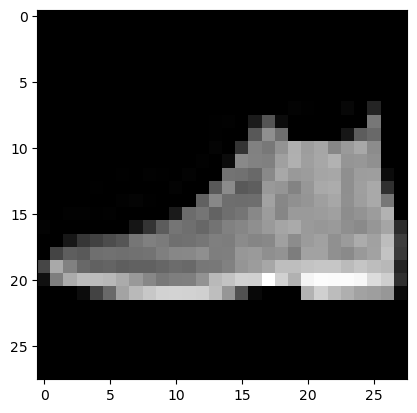

Model prediction: 9


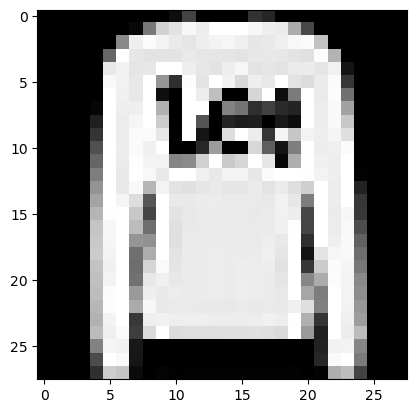

Model prediction: 2


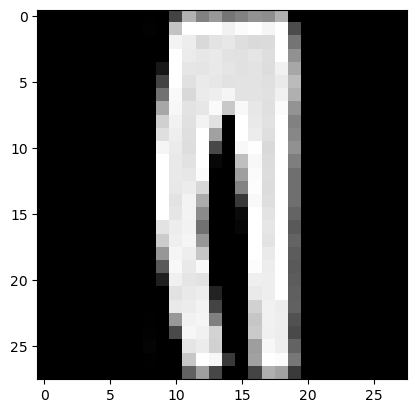

Model prediction: 1


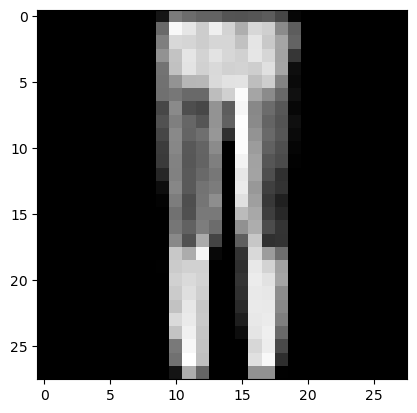

Model prediction: 1


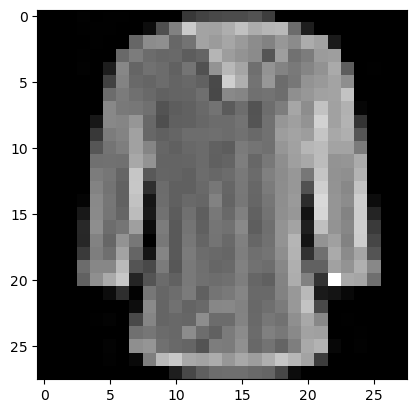

Model prediction: 2


In [21]:
#Predict 5 images from validation set.
n_images = 5
test_images = xtest[:n_images]
predictions = neural_network(test_images)
# Display image and model prediction.
for i in range(n_images):
 plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
 plt.show()
 print("Model prediction: %i" % np.argmax(predictions.numpy()[i]))